In [35]:
from langchain_aws import ChatBedrockConverse

llm = ChatBedrockConverse(
    model_id="anthropic.claude-3-5-sonnet-20240620-v1:0",
    # region_name=...,
    # aws_access_key_id=...,
    # aws_secret_access_key=...,
    # aws_session_token=...,
    # temperature=...,
    # max_tokens=...,
    # other params...
)

In [5]:
messages = [
    (
        "system",
        "You are a helpful assistant that translates English to Bengali. Translate the user sentence.",
    ),
    ("human", "I love programming."),
]
ai_msg = llm.invoke(messages)
ai_msg

AIMessage(content='আমি প্রোগ্রামিং পছন্দ করি।\n\n(Ami programming pochondo kori.)', additional_kwargs={}, response_metadata={'ResponseMetadata': {'RequestId': '1d68730e-f8a4-4964-93f8-ad8c3a97c9a4', 'HTTPStatusCode': 200, 'HTTPHeaders': {'date': 'Thu, 14 Aug 2025 06:12:59 GMT', 'content-type': 'application/json', 'content-length': '290', 'connection': 'keep-alive', 'x-amzn-requestid': '1d68730e-f8a4-4964-93f8-ad8c3a97c9a4'}, 'RetryAttempts': 0}, 'stopReason': 'end_turn', 'metrics': {'latencyMs': [1150]}, 'model_name': 'anthropic.claude-3-5-sonnet-20240620-v1:0'}, id='run--f910ad9f-3fa8-4519-9694-640a0ec0976e-0', usage_metadata={'input_tokens': 29, 'output_tokens': 36, 'total_tokens': 65, 'input_token_details': {'cache_creation': 0, 'cache_read': 0}})

In [6]:
print(ai_msg.content)

আমি প্রোগ্রামিং পছন্দ করি।

(Ami programming pochondo kori.)


In [8]:
from typing import Annotated

from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages


class State(TypedDict):
    # Messages have the type "list". The `add_messages` function
    # in the annotation defines how this state key should be updated
    # (in this case, it appends messages to the list, rather than overwriting them)
    messages: Annotated[list, add_messages]


graph_builder = StateGraph(State)

In [ ]:

from langchain.chat_models import init_chat_model

# Follow the steps here to configure your credentials:
# https://docs.aws.amazon.com/bedrock/latest/userguide/getting-started.html

llm = init_chat_model(
    "anthropic.claude-3-5-sonnet-20240620-v1:0",
    model_provider="bedrock_converse",
)

In [9]:
def chatbot(state: State):
    return {"messages": [llm.invoke(state["messages"])]}


# The first argument is the unique node name
# The second argument is the function or object that will be called whenever
# the node is used.
graph_builder.add_node("chatbot", chatbot)

In [10]:
graph_builder.add_edge(START, "chatbot")

In [11]:
graph_builder.add_edge("chatbot", END)

In [12]:
graph = graph_builder.compile()

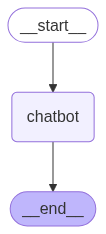

In [13]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [15]:
def stream_graph_updates(user_input: str):
    for event in graph.stream({"messages": [{"role": "user", "content": user_input}]}):
        for value in event.values():
            print("Assistant:", value["messages"][-1].content)


while True:
    try:
        user_input = input("User: ")
        if user_input.lower() in ["quit", "exit", "q"]:
            print("Goodbye!")
            break
        stream_graph_updates(user_input)
    except:
        # fallback if input() is not available
        user_input = "What do you know about LangGraph?"
        print("User: " + user_input)
        stream_graph_updates(user_input)
        break

Assistant: Bhavish Aggarwal is an Indian entrepreneur and businessman, best known as the co-founder and CEO of Ola Cabs (now Ola Electric). Here are some key points about him:

1. Born in 1985 in Ludhiana, Punjab, India.

2. Graduated from the Indian Institute of Technology (IIT) Bombay in 2008 with a degree in Computer Science and Engineering.

3. Co-founded Ola Cabs in 2010 with Ankit Bhati, which grew to become one of India's largest ride-hailing companies.

4. Expanded Ola's operations internationally to countries like the UK, Australia, and New Zealand.

5. Pivoted the company towards electric mobility, launching Ola Electric in 2017 to focus on electric scooters and other EVs.

6. Known for his ambitious goals and aggressive business strategies.

7. Has received several accolades, including being listed in Time Magazine's 100 Most Influential People of 2018.

8. Faced some controversies, including conflicts with investors and challenges in the electric scooter launch.

9. Conside

#### add a online tool in case model not able to answer

In [17]:
from dotenv import load_dotenv
import os

load_dotenv()

True

In [19]:
TAVILY_API_KEY=os.environ.get('TAVILY_API_KEY')

{'query': "What's a 'node' in LangGraph?",
 'follow_up_questions': None,
 'answer': None,
 'images': [],
 'results': [{'url': 'https://www.ibm.com/think/topics/langgraph',
   'title': 'What is LangGraph? - IBM',
   'content': 'LangGraph, created by LangChain, is an open source AI agent framework designed to build, deploy and manage complex generative AI agent workflows. At its core, LangGraph uses the power of graph-based architectures to model and manage the intricate relationships between various components of an AI agent workflow. LangGraph illuminates the processes within an AI workflow, allowing full transparency of the agent’s state. By combining these technologies with a set of APIs and tools, LangGraph provides users with a versatile platform for developing AI solutions and workflows including chatbots, state graphs and other agent-based systems. Nodes: In LangGraph, nodes represent individual components or agents within an AI workflow. LangGraph uses enhanced decision-making b

In [21]:
from langchain.chat_models import init_chat_model


llm = init_chat_model(
    "anthropic.claude-3-5-sonnet-20240620-v1:0",
    model_provider="bedrock_converse",
)

In [22]:
from typing import Annotated

from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

class State(TypedDict):
    messages: Annotated[list, add_messages]

graph_builder = StateGraph(State)

# Modification: tell the LLM which tools it can call
llm_with_tools = llm.bind_tools(tools)

def chatbot(state: State):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}

graph_builder.add_node("chatbot", chatbot)

In [23]:
import json

from langchain_core.messages import ToolMessage


class BasicToolNode:
    """A node that runs the tools requested in the last AIMessage."""

    def __init__(self, tools: list) -> None:
        self.tools_by_name = {tool.name: tool for tool in tools}

    def __call__(self, inputs: dict):
        if messages := inputs.get("messages", []):
            message = messages[-1]
        else:
            raise ValueError("No message found in input")
        outputs = []
        for tool_call in message.tool_calls:
            tool_result = self.tools_by_name[tool_call["name"]].invoke(
                tool_call["args"]
            )
            outputs.append(
                ToolMessage(
                    content=json.dumps(tool_result),
                    name=tool_call["name"],
                    tool_call_id=tool_call["id"],
                )
            )
        return {"messages": outputs}


tool_node = BasicToolNode(tools=[tool])
graph_builder.add_node("tools", tool_node)

In [24]:
def route_tools(
    state: State,
):
    """
    Use in the conditional_edge to route to the ToolNode if the last message
    has tool calls. Otherwise, route to the end.
    """
    if isinstance(state, list):
        ai_message = state[-1]
    elif messages := state.get("messages", []):
        ai_message = messages[-1]
    else:
        raise ValueError(f"No messages found in input state to tool_edge: {state}")
    if hasattr(ai_message, "tool_calls") and len(ai_message.tool_calls) > 0:
        return "tools"
    return END


# The `tools_condition` function returns "tools" if the chatbot asks to use a tool, and "END" if
# it is fine directly responding. This conditional routing defines the main agent loop.
graph_builder.add_conditional_edges(
    "chatbot",
    route_tools,
    # The following dictionary lets you tell the graph to interpret the condition's outputs as a specific node
    # It defaults to the identity function, but if you
    # want to use a node named something else apart from "tools",
    # You can update the value of the dictionary to something else
    # e.g., "tools": "my_tools"
    {"tools": "tools", END: END},
)
# Any time a tool is called, we return to the chatbot to decide the next step
graph_builder.add_edge("tools", "chatbot")
graph_builder.add_edge(START, "chatbot")
graph = graph_builder.compile()

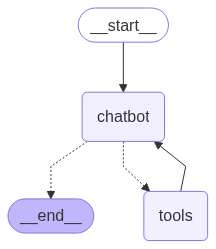

In [25]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [26]:
def stream_graph_updates(user_input: str):
    for event in graph.stream({"messages": [{"role": "user", "content": user_input}]}):
        for value in event.values():
            print("Assistant:", value["messages"][-1].content)

while True:
    try:
        user_input = input("User: ")
        if user_input.lower() in ["quit", "exit", "q"]:
            print("Goodbye!")
            break

        stream_graph_updates(user_input)
    except:
        # fallback if input() is not available
        user_input = "What do you know about LangGraph?"
        print("User: " + user_input)
        stream_graph_updates(user_input)
        break

Assistant: [{'type': 'text', 'text': 'To get the current stock prices of Tesla and NVIDIA, we\'ll need to use the Tavily search engine to find the most up-to-date financial information. Since this is a finance-related query, we\'ll use the "finance" topic for more accurate results. Let\'s search for each company separately to ensure we get precise information.'}, {'type': 'tool_use', 'name': 'tavily_search', 'input': {'query': 'Tesla current stock price TSLA', 'topic': 'finance'}, 'id': 'tooluse_qP-h9bEOQM-jweJ9qt0qiA'}]
Assistant: {"query": "Tesla current stock price TSLA", "follow_up_questions": null, "answer": null, "images": [], "results": [{"title": "Financial Analysis for TSLA", "url": "https://finance.yahoo.com/quote/TSLA/", "content": "Stock: TSLA\nFinancial Analysis:\nLatest Open Price: 341.50 Latest Close Price: 339.38 Highest Close Price: 479.86 Lowest Close Price: 142.05 Average Close Price (2 years): 259.08 Standard Deviation of Close Price: 69.73 Volume Traded (2 years): 

#### remember previous chat question and answer

In [ ]:
from langgraph.checkpoint.memory import InMemorySaver

memory = InMemorySaver()

from langchain_tavily import TavilySearch
from dotenv import load_dotenv
import os

load_dotenv()

from typing import Annotated

from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

TAVILY_API_KEY=os.environ.get('TAVILY_API_KEY')
class State(TypedDict):
    # Messages have the type "list". The `add_messages` function
    # in the annotation defines how this state key should be updated
    # (in this case, it appends messages to the list, rather than overwriting them)
    messages: Annotated[list, add_messages]


graph_builder = StateGraph(State)
from langchain.chat_models import init_chat_model

# Follow the steps here to configure your credentials:
# https://docs.aws.amazon.com/bedrock/latest/userguide/getting-started.html

llm = init_chat_model(
    "anthropic.claude-3-5-sonnet-20240620-v1:0",
    model_provider="bedrock_converse",
)
tool = TavilySearch(max_results=2)
tools = [tool]
tool.invoke("What's a 'node' in LangGraph?")

In [ ]:
g
raph = graph_builder.compile(checkpointer=memory)

In [ ]:

config = {"configurable": {"thread_id": "1"}}

In [31]:
user_input = "Hi there! My name is tausif."

# The config is the **second positional argument** to stream() or invoke()!
events = graph.stream(
    {"messages": [{"role": "user", "content": user_input}]},
    config,
    stream_mode="values",
)
for event in events:
    event["messages"][-1].pretty_print()

================================ Human Message =================================

Hi there! My name is tausif.
================================== Ai Message ==================================

I apologize for the confusion earlier, Tausif. Thank you for correcting me. It's nice to meet you! How can I help you today? Is there anything specific you'd like to know about or discuss?


In [ ]:

user_input = "Remember my name?"

# The config is the **second positional argument** to stream() or invoke()!
events = graph.stream(
    {"messages": [{"role": "user", "content": user_input}]},
    config,
    stream_mode="values",
)
for event in events:
    event["messages"][-1].pretty_print()

================================ Human Message =================================

Remember my name?
================================== Ai Message ==================================

Of course, Tausif. I remember your name. You introduced yourself as Tausif, and I've made note of that. Is there anything in particular you'd like to talk about or any questions you have? I'm here to help with any information or assistance you might need.


In [33]:
# The only difference is we change the `thread_id` here to "2" instead of "1"
events = graph.stream(
    {"messages": [{"role": "user", "content": user_input}]},
    {"configurable": {"thread_id": "2"}},
    stream_mode="values",
)
for event in events:
    event["messages"][-1].pretty_print()

================================ Human Message =================================

Remember my name?
================================== Ai Message ==================================

I apologize, but I don't have any prior context or memory of your name. As an AI language model, I don't retain information from previous conversations or have personal memory. Each interaction starts fresh. If you'd like me to use a specific name for you, please let me know, and I'll be happy to address you by that name during our current conversation.


In [34]:
snapshot = graph.get_state(config)
snapshot

StateSnapshot(values={'messages': [HumanMessage(content='Hi there! My name is Will.', additional_kwargs={}, response_metadata={}, id='b971f9e6-3cdb-4aba-8a71-4083732ac219'), AIMessage(content="Hello Will! It's nice to meet you. How can I assist you today? Is there anything specific you'd like to know or discuss?", additional_kwargs={}, response_metadata={'ResponseMetadata': {'RequestId': 'c83476c6-7368-48bd-befa-9fde77e3607e', 'HTTPStatusCode': 200, 'HTTPHeaders': {'date': 'Thu, 14 Aug 2025 06:34:12 GMT', 'content-type': 'application/json', 'content-length': '306', 'connection': 'keep-alive', 'x-amzn-requestid': 'c83476c6-7368-48bd-befa-9fde77e3607e'}, 'RetryAttempts': 0}, 'stopReason': 'end_turn', 'metrics': {'latencyMs': [1739]}, 'model_name': 'anthropic.claude-3-5-sonnet-20240620-v1:0'}, id='run--4d4dc273-77ca-484f-90df-ec0d2d740d54-0', usage_metadata={'input_tokens': 2106, 'output_tokens': 32, 'total_tokens': 2138, 'input_token_details': {'cache_creation': 0, 'cache_read': 0}}), Hu